<a href="https://colab.research.google.com/github/NohaJereen/CMC-6402/blob/main/Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install GCfit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.1/554.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.2/108.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 6.0 MB/s eta 0:00:00


In [ ]:
from limepy import limepy
import gcfit
from gcfit import analysis
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import os
os.environ['GCFIT_DIR'] = '/content/sample_data'

In [ ]:
cluster = "25cmc4.hdf"
obs = gcfit.Observations(cluster)

nest_run_1 = analysis.NestedRun('/content/sample_data/25cmc6_sampler.hdf', obs)

In [ ]:
nest_run_2 = analysis.NestedRun('/content/sample_data/5cmc4_sampler.hdf', obs)

In [ ]:
nest_run_3 = analysis.NestedRun('/content/sample_data/25cmc3_sampler.hdf', obs)
mviz_3 = nest_run_3.get_CImodel(load=True)

In [ ]:
nest_run_4 = analysis.NestedRun('/content/sample_data/mainfile_sampler.hdf', obs)
mviz_4 = nest_run_4.get_CImodel(load=True)

In [ ]:
mviz_1 = nest_run_1.get_CImodel(load=True)

In [ ]:
mviz_2 = nest_run_2.get_CImodel(load=True)

##blackhole mass fraction

In [ ]:
mviz_1.f_BH
import numpy as np

median_f_BH = np.median(mviz_1.f_BH)
lower_limit = np.percentile(mviz_1.f_BH, 16)
upper_limit = np.percentile(mviz_1.f_BH, 84)

print(f"Median: {median_f_BH}")
print(f"Lower 16th percentile: {lower_limit}")
print(f"Upper 84th percentile: {upper_limit}")


Median: 1.9134495639529603 %
Lower 16th percentile: 1.528426467835243 %
Upper 84th percentile: 2.323286793705676 %


BH_mass

In [ ]:
np.median(mviz_2.BH_mass)


<Quantity 2976.08067076 solMass>

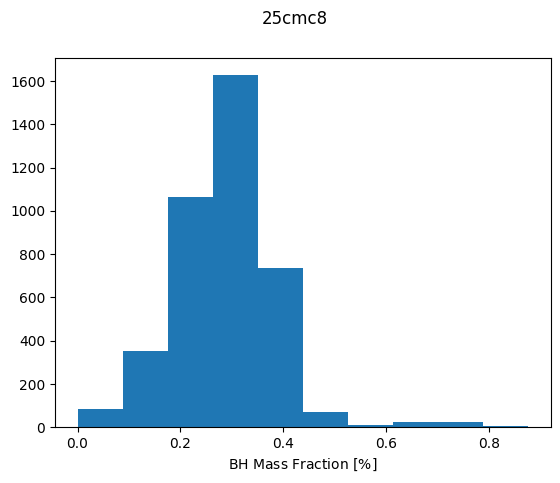

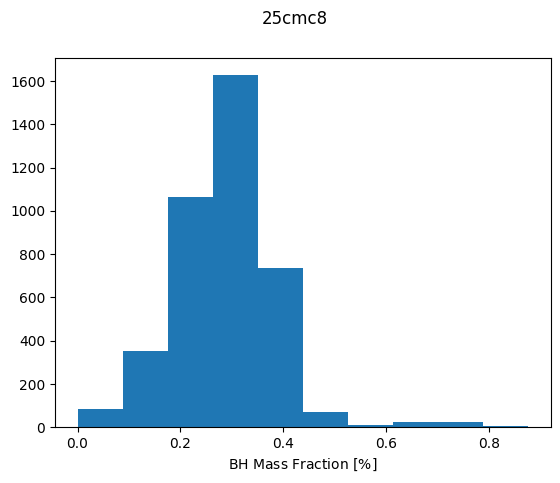

In [ ]:
mviz_1.plot_f_BH()

In [ ]:
import numpy as np
import pandas as pd

# Assuming mviz_1.f_BH is your array
bh = mviz_2.f_BH

# Compute median and 1σ error bars (16th and 84th percentiles)
median = np.median(bh)
lower_error = median - np.percentile(bh, 16)  # Distance from median to 16th percentile
upper_error = np.percentile(bh, 84) - median  # Distance from median to 84th percentile

# Create a DataFrame
bh_df = pd.DataFrame({
    "Median": [median],
    "Lower Error": [lower_error],
    "Upper Error": [upper_error]
})

# Save as CSV file
bh_df.to_csv("f_BH.csv", index=False)

print("Saved as f_BH.csv")

Saved as f_BH.csv


In [ ]:
import numpy as np
import pandas as pd

# Assuming mviz_1.f_BH is your array
bh_amount = mviz_2.BH_num

# Compute median and 1σ error bars (16th and 84th percentiles)
median = np.median(bh_amount)
lower_error = median - np.percentile(bh_amount, 16)  # Distance from median to 16th percentile
upper_error = np.percentile(bh_amount, 84) - median  # Distance from median to 84th percentile

# Create a DataFrame
bh_amount = pd.DataFrame({
    "Median": [median],

    "Upper Error": [upper_error],
    "Lower Error": [lower_error]
})


bh_amount.to_csv("f_BH_amount.csv", index=False)

print("Saved as f_BH_amount.csv")

Saved as f_BH_amount.csv


In [ ]:
import numpy as np
import pandas as pd

# Assuming mviz_1.f_BH is your array
bh_mass = mviz_2.BH_mass

# Compute median and 1σ error bars (16th and 84th percentiles)
median = np.median(bh_mass)
lower_error = median - np.percentile(bh_mass, 16)  # Distance from median to 16th percentile
upper_error = np.percentile(bh_mass, 84) - median  # Distance from median to 84th percentile

# Create a DataFrame
bh_mass = pd.DataFrame({
    "Median": [median],

    "Upper Error": [upper_error],
    "Lower Error": [lower_error]
})


bh_mass.to_csv("f_BH_mst.csv", index=False)

print("Saved as f_BH_mst.csv")

Saved as f_BH_mst.csv


PLOT PROFILES

In [ ]:
import numpy as np

# Assuming array_values contains your sample data as a 2D array
# For example: array_values.shape might be (n_samples, n_parameters)
# Replace the following line with your actual method to get samples
column_names, array_values = nest_run_3._get_equal_weight_chains()

# Calculate the median for each parameter
medians = np.median(array_values, axis=0)

# Print the median for each parameter
for name, median in zip(column_names, medians):
    print(f'Median of {name}: {median}')

Median of W0: 2.9524112293616156
Median of M: 0.3872072127417874
Median of rh: 4.739015124673077
Median of ra: 0.5414385872951752
Median of g: 1.1183303977895718
Median of delta: 0.3769530813535838
Median of s2: 7.7143570735468625
Median of F: 4.208562511451504
Median of a1: 1.234027964641625
Median of a2: 2.293404151807567
Median of a3: 2.390643472261199
Median of BHret: 8.381839796149933
Median of d: 8.844944857871855


In [ ]:
column_names, array_values = nest_run_3._get_equal_weight_chains()
import numpy as np
import pandas as pd
# Calculate the median, 16th, and 84th percentiles for each parameter
medians = np.median(array_values, axis=0)
percentiles_16 = np.percentile(array_values, 16, axis=0)
percentiles_84 = np.percentile(array_values, 84, axis=0)

# Create a DataFrame to organize the results
results_df = pd.DataFrame({
    'Parameter': column_names,
    'Median': medians,
    '16th Percentile': percentiles_16,
    '84th Percentile': percentiles_84
})

# Round the numerical values to 3 decimal places
results_df[['Median', '16th Percentile', '84th Percentile']] = results_df[['Median', '16th Percentile', '84th Percentile']].round(3)

# Specify the filename for the Excel output
output_filename = 'parameter_statistics.csv'

# Export the DataFrame to an Excel file
results_df.to_csv(output_filename, index=False)

print(f'Statistics saved to {output_filename}')


Statistics saved to parameter_statistics.csv


/usr/local/lib/python3.11/dist-packages/gcfit/analysis/models.py:649: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  return ax.errorbar(xdata, ydata, xerr=xerr, yerr=yerr,


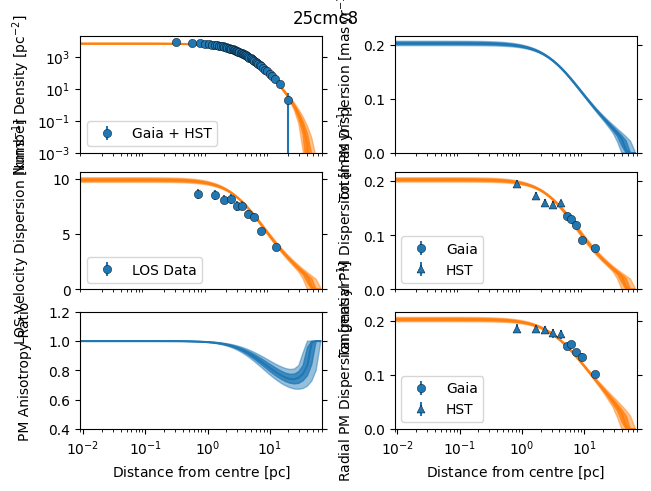

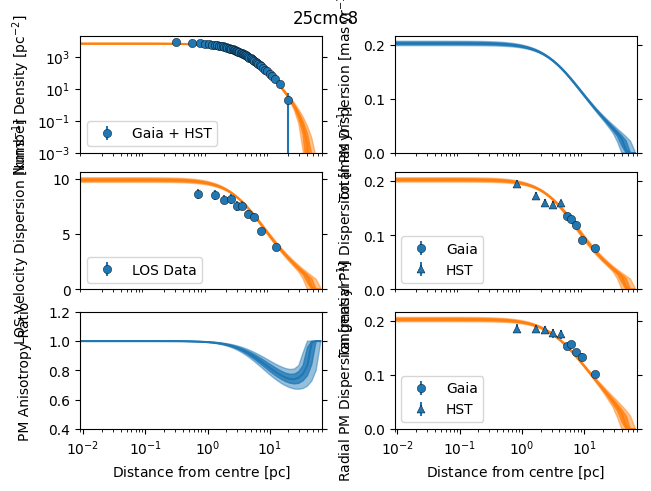

In [ ]:

mviz_1.plot_all()



/usr/local/lib/python3.11/dist-packages/gcfit/analysis/models.py:649: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  return ax.errorbar(xdata, ydata, xerr=xerr, yerr=yerr,


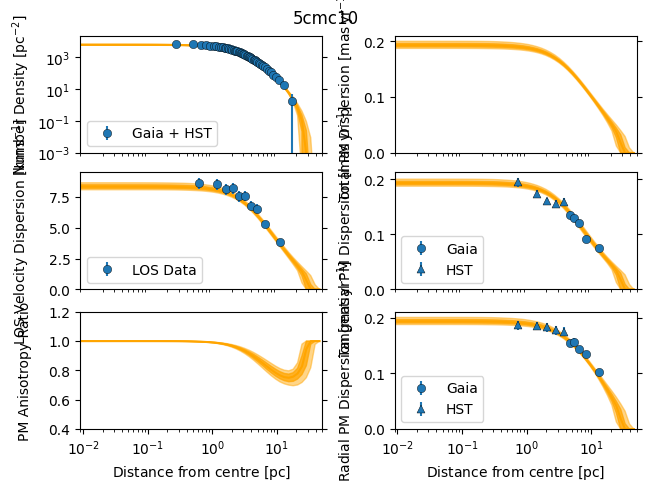

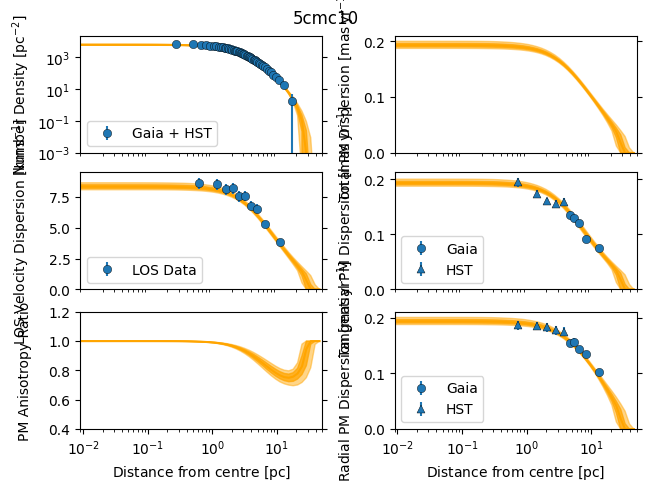

In [ ]:

mviz_1.plot_all(model_color='orange')

In [ ]:
fig = mviz_1.plot_all(model_color='orange')  # Assuming this returns a single figure
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
fig.set_size_inches(12, 9)
# Example labels for each plot
x_labels = ['Distance from centre [pc]', 'Distance from centre [pc]', 'Distance from centre [pc]', 'Distance from centre [pc]', 'Distance from centre [pc]', 'Distance from centre [pc]']
y_labels = ['Number Density [pc^-2]','Total PM velocity dispersion [mass yr^-1]',
            'LOS velocity dispersion [kms^-1]', 'Tangential PM velocity dispersion [mass yr^-1]',
            'PM anisotropy ratio', 'Radial PM velocity dispersion [mass yr^-1]']

# Customize plot elements for each subplot
for ax, x_label, y_label in zip(fig.axes, x_labels, y_labels):
    ax.set_xlabel(x_label, fontsize=7)
    ax.set_ylabel(y_label, fontsize=7)
    ax.legend(fontsize=5)
    ax.tick_params(axis='both', which='major', labelsize=5)

# Adjust spacing between subplots
fig.tight_layout(pad=0.99)  # Increase padding

# Save the figure to a PDF
pdf_filename = 'all plots 10.3.pdf'
with PdfPages(pdf_filename) as pdf:
    pdf.savefig(fig)  # Save the figure into the PDF
    plt.close(fig)  # Close the figure to free up memory

plt.savefig("25_5.png", dpi=300, bbox_inches="tight")
print(f"Plot has been saved to {pdf_filename}")

/usr/local/lib/python3.11/dist-packages/gcfit/analysis/models.py:649: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  return ax.errorbar(xdata, ydata, xerr=xerr, yerr=yerr,
<ipython-input-186-e4fd9902d5a6>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=5)
<ipython-input-186-e4fd9902d5a6>:19: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=0.99)  # Increase padding


Plot has been saved to all plots 10.3.pdf


<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/ads/base.py:135: RuntimeWarning: No token found
  warnings.warn("No token found", RuntimeWarning)
/usr/local/lib/python3.11/dist-packages/ads/base.py:135: RuntimeWarning: No token found
  warnings.warn("No token found", RuntimeWarning)
/usr/local/lib/python3.11/dist-packages/ads/base.py:135: RuntimeWarning: No token found
  warnings.warn("No token found", RuntimeWarning)
/usr/local/lib/python3.11/dist-packages/ads/base.py:135: RuntimeWarning: No token found
  warnings.warn("No token found", RuntimeWarning)
/usr/local/lib/python3.11/dist-packages/ads/base.py:135: RuntimeWarning: No token found
  warnings.warn("No token found", RuntimeWarning)
<ipython-input-56-557abe857c91>:23: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=0.99)  # Increase padding


Plot has been saved and onlyp_p_plot.jpg


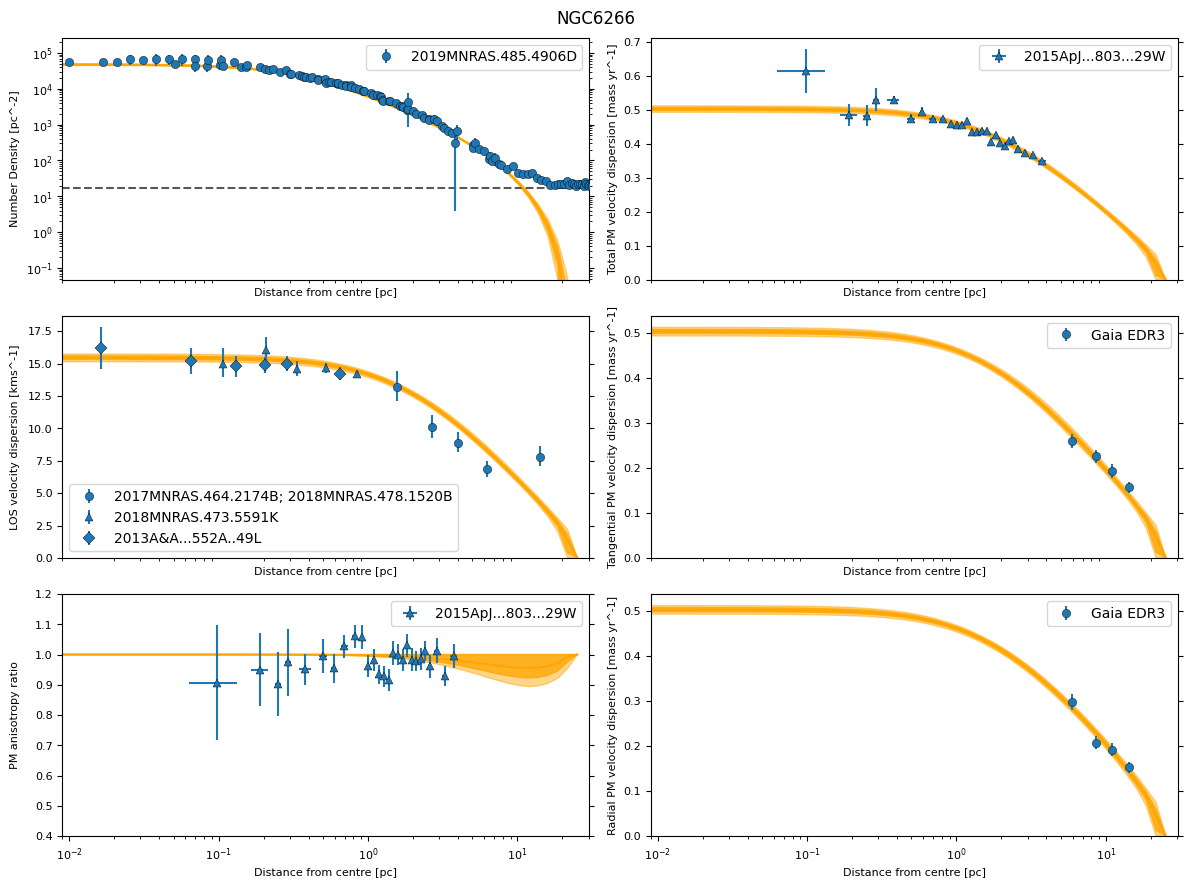

In [ ]:
fig = mviz_1.plot_all(model_color='orange')  # Assuming this returns a single figure
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

fig.set_size_inches(12, 9)

# Example labels for each plot
x_labels = ['Distance from centre [pc]'] * 6
y_labels = [
    'Number Density [pc^-2]', 'Total PM velocity dispersion [mass yr^-1]',
    'LOS velocity dispersion [kms^-1]', 'Tangential PM velocity dispersion [mass yr^-1]',
    'PM anisotropy ratio', 'Radial PM velocity dispersion [mass yr^-1]'
]

# Customize plot elements for each subplot
for ax, x_label, y_label in zip(fig.axes, x_labels, y_labels):
    ax.set_xlabel(x_label, fontsize=8)
    ax.set_ylabel(y_label, fontsize=8)

    ax.tick_params(axis='both', which='major', labelsize=8)

# Adjust spacing between subplots
fig.tight_layout(pad=0.99)  # Increase padding


# Save as JPG
jpg_filename = "onlyp_p_plot.jpg"
fig.savefig(jpg_filename, dpi=300, bbox_inches="tight", format='jpg')

print(f"Plot has been saved and {jpg_filename}")

In [ ]:
fig = mviz_2.plot_all()  # Assuming this returns a single figure
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
fig.set_size_inches(12, 9)
# Example labels for each plot
x_labels = ['Distance from centre [pc]', 'Distance from centre [pc]', 'Distance from centre [pc]', 'Distance from centre [pc]', 'Distance from centre [pc]', 'Distance from centre [pc]']
y_labels = ['Number Density [pc^-2]','Total PM velocity dispersion [mass yr^-1]',
            'LOS velocity dispersion [kms^-1]', 'Tangential PM velocity dispersion [mass yr^-1]',
            'PM anisotropy ratio', 'Radial PM velocity dispersion [mass yr^-1]']

# Customize plot elements for each subplot
for ax, x_label, y_label in zip(fig.axes, x_labels, y_labels):
    ax.set_xlabel(x_label, fontsize=7)
    ax.set_ylabel(y_label, fontsize=7)
    ax.legend(fontsize=5)
    ax.tick_params(axis='both', which='major', labelsize=5)

# Adjust spacing between subplots
fig.tight_layout(pad=0.99)  # Increase padding

# Save the figure to a PDF
pdf_filename = 'all plots 25.2.pdf'
with PdfPages(pdf_filename) as pdf:
    pdf.savefig(fig)  # Save the figure into the PDF
    plt.close(fig)  # Close the figure to free up memory

print(f"Plot has been saved to {pdf_filename}")

Mass function

<ipython-input-21-1861a8129fbc>:7: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=10)  # Increase padding


Plot has been saved to all plots 10.3.pdf and MAss fraction.jpg


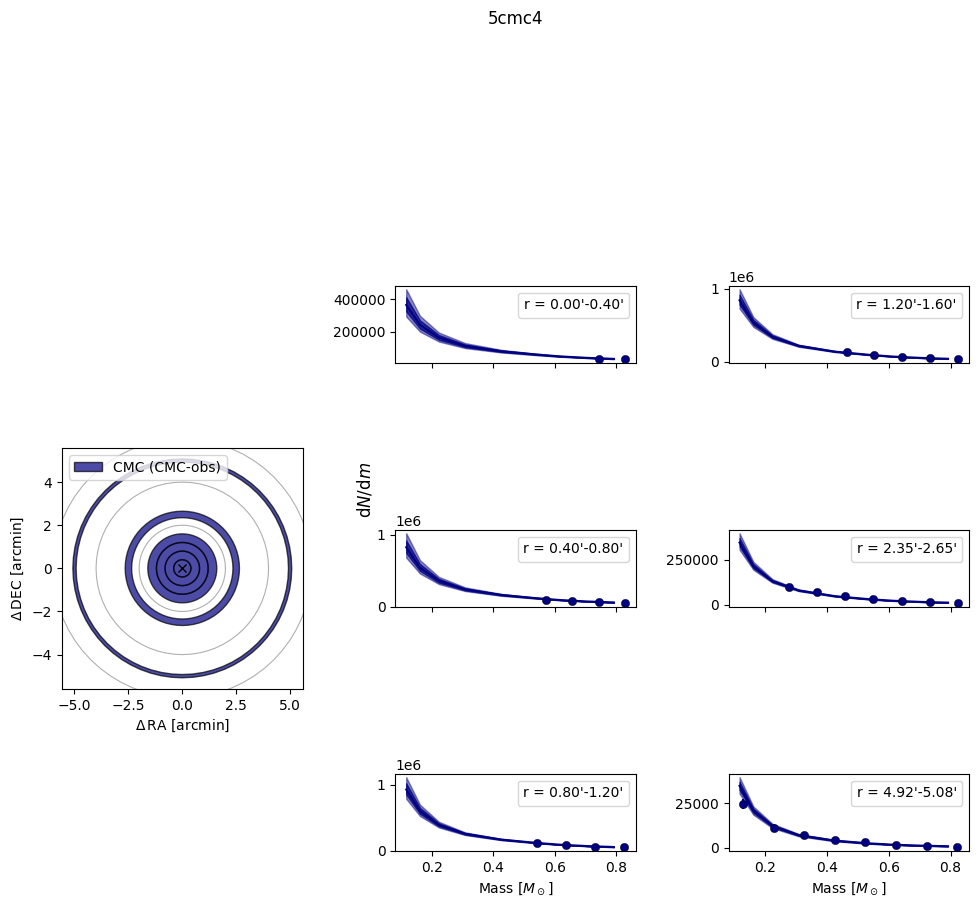

In [ ]:
fig = mviz_1.plot_mass_func()  # Assuming this returns a single figure
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
fig.set_size_inches(10,10)

# Adjust spacing between subplots
fig.tight_layout(pad=10)  # Increase padding


# Save as JPG
jpg_filename = "MAss fraction.jpg"
fig.savefig(jpg_filename, dpi=300, bbox_inches="tight", format='jpg')

print(f"Plot has been saved to {pdf_filename} and {jpg_filename}")

In [ ]:
fig = mviz_2.plot_mass_func()  # Assuming this returns a single figure
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
fig.set_size_inches(10,10)

# Adjust spacing between subplots
fig.tight_layout(pad=8)  # Increase padding

# Save the figure to a PDF
pdf_filename = 'mass function 25.2.pdf'
with PdfPages(pdf_filename) as pdf:
    pdf.savefig(fig)  # Save the figure into the PDF
    plt.close(fig)  # Close the figure to free up memory

print(f"Plot has been saved to {pdf_filename}")

<ipython-input-39-a36d7366e942>:6: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  figs.tight_layout(pad=8)


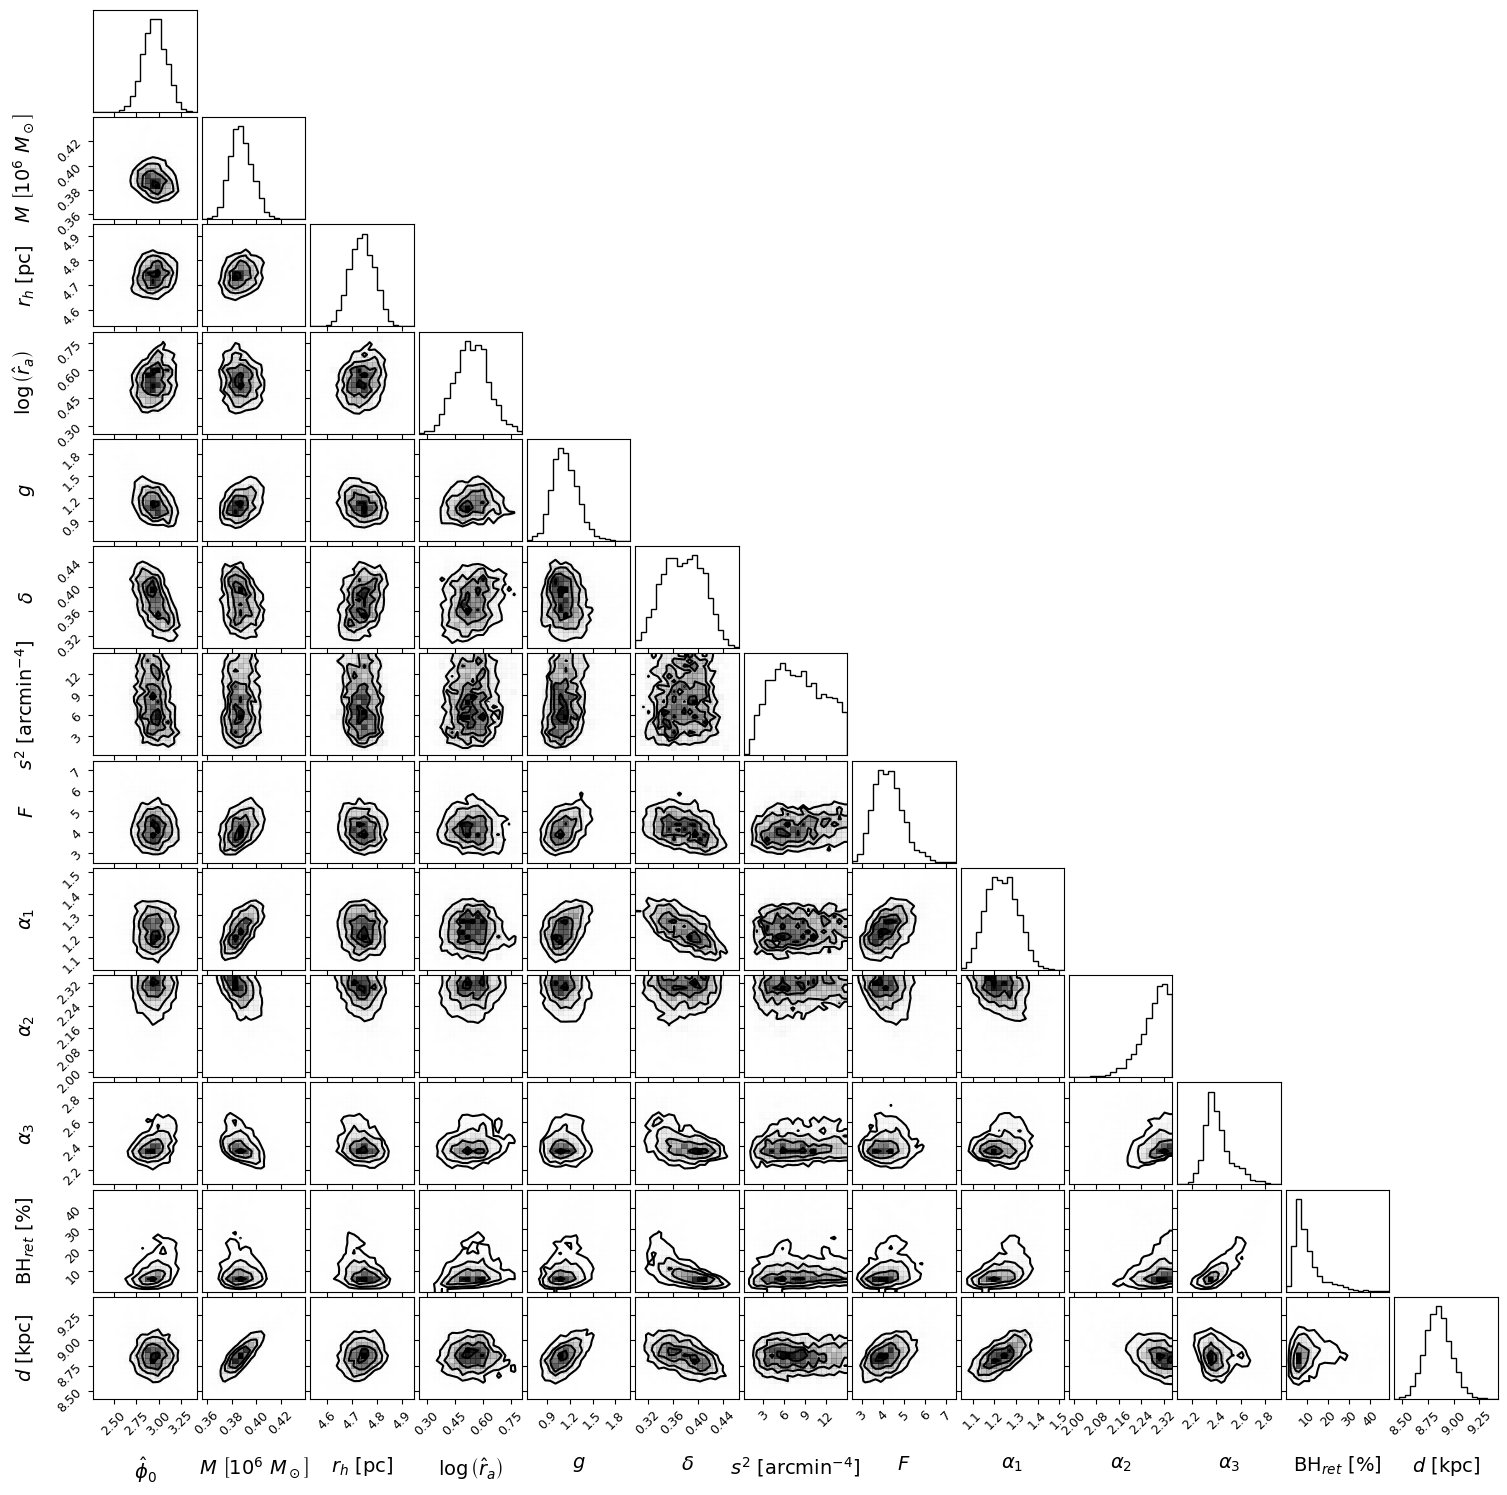

In [ ]:
import matplotlib.pyplot as plt
params=['M', 'rh', 'BHret']
figs =nest_run_1.plot_marginals()
# Generate the corner plot
corner_fig = figs
figs.tight_layout(pad=8)
# Adjust the font size for labels
corner_fig.set_size_inches(11,11)  # Make the figure larger
plt.rcParams.update({

    "axes.titlesize": 10,  # Title font size
    "axes.labelsize": 14,  # Axis label size
    "xtick.labelsize": 9,  # X-axis tick label size
    "ytick.labelsize": 9,  # Y-axis tick label size

})
corner_fig.set_size_inches(15,15)
# Export the plot to a PDF file
corner_fig.savefig("corner_plot.jpg", format="jpg", dpi=300)
plt.show()

SyntaxError: invalid decimal literal (<ipython-input-137-eacb8c52b7eb>, line 1)

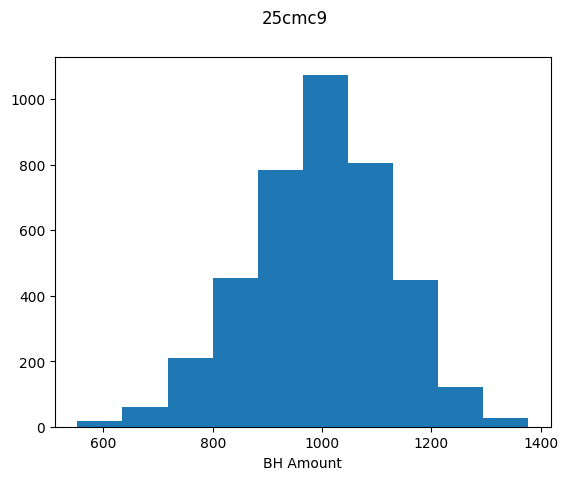

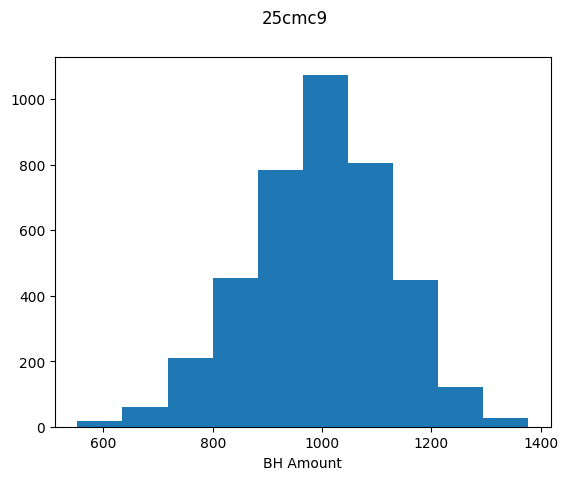

In [ ]:
mviz_1.plot_BH_num()

In [ ]:
figs_bh =mviz_1.plot_f_BH(color='red', label='BH mass fraction', bins=50, density = True)  # Assuming this returns a single figure
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
figs_bh.set_size_inches(4,4)

# Adjust spacing between subplots
#figs_bh.tight_layout(pad=8)  # Increase padding
for ax in figs_bh.get_axes():
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.xaxis.label.set_size(4)
    ax.yaxis.label.set_size(4)
    ax.title.set_size(8)
# Save the figure to a PDF
pdf_filename = 'bh amount.pdf'
with PdfPages(pdf_filename) as pdf:
    pdf.savefig(figs_bh)  # Save the figure into the PDF
    plt.close(figs_bh)  # Close the figure to free up memory

print(f"Plot has been saved to {pdf_filename}")

Plot has been saved to bh amount.pdf


TypeError: 'Figure' object is not callable

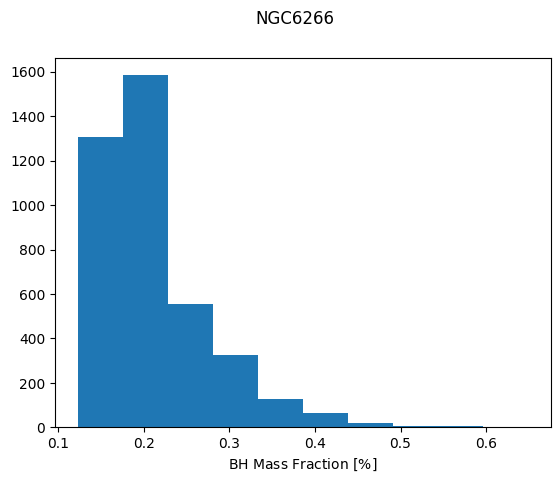

In [ ]:
# Generate the initial plot with a specific color
fig_p = mviz_1.plot_f_BH()(color='yellow', label='with pulsars', bins=250, density = True, alpha=0.8) # Changed bin to bins mviz_p.plot_f_BH()

# Add the second plot to the existing figure with a different color
mviz_2.plot_f_BH()(fig=fig_p, color='blue', label='without pulsar', bins=250, density = True, alpha=0.5)

# Adjust the size of the figure if necessary
fig_p.set_size_inches(6,4)

# Add labels, legend, and title as needed
ax_combined = fig_p.gca()  # Get the current axis of the figure
ax_combined.set_xlabel('BH amount')
ax_combined.set_ylabel('Prob density')
ax_combined.set_title('Combined Plot')

ax_combined.legend()

# Show or save the combined figure
plt.show()

In [ ]:
# Add the second plot to the existing figure with a different color
mviz_2.plot_BH_num(fig=fig_p, color='blue', label='without pulsar', bins=250, density = True, alpha=0.5)

# Adjust the size of the figure if necessary
fig_p.set_size_inches(6,4)

# Add labels, legend, and title as needed
ax_combined = fig_p.gca()  # Get the current axis of the figure
ax_combined.set_xlabel('BH amount')
ax_combined.set_ylabel('Prob density')
ax_combined.set_title('Combined Plot')

ax_combined.legend()

# Show or save the combined figure
plt.show()

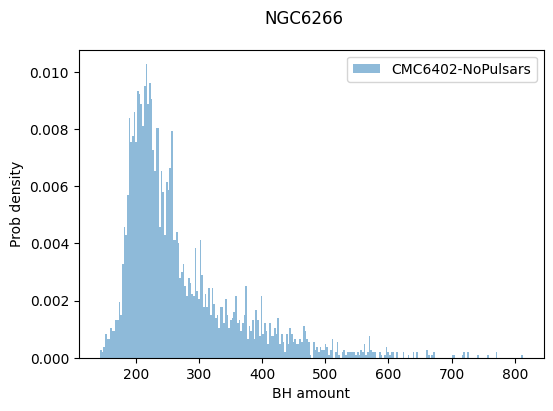

In [ ]:
import matplotlib.pyplot as plt

# Create figure and axis
fig_p, ax = plt.subplots(figsize=(6, 4))

# Plot with transparency, providing the figure object fig_p instead of ax
mviz_1.plot_BH_num(fig_p, ax=ax, color='blue', label='CMC6402-NoPulsars', bins=250, density=True, alpha=0.5)  # Changed fig to fig_p
#mviz_2.plot_BH_num(fig=fig_p, ax=ax, color='orange', label='CMC6402-25Pulsars', bins=250, density=True, alpha=0.5)  # Changed fig to fig_p

# Customize labels and title
ax.set_xlabel('BH amount')
ax.set_ylabel('Prob density')


# Force legend to appear correctly
ax.legend()

# Ensure transparent background
fig_p.patch.set_alpha(0)  # Figure background
ax.patch.set_alpha(0)      # Axis background

# Show or save with transparency
plt.savefig('transparent_figure.png', dpi=300, transparent=True)
plt.show()

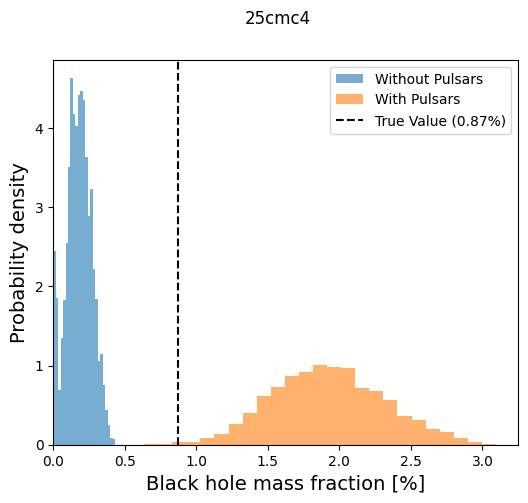

In [ ]:
import matplotlib.pyplot as plt

# Create figure and axis
fig_p, ax = plt.subplots(figsize=(6, 5))

# Plot with transparency, providing the figure object fig_p instead of ax
mviz_3.plot_f_BH(fig_p, ax=ax, color='blue', label='Without Pulsars', bins=25, density=True, alpha=0.6)  # Changed fig to fig_p
mviz_1.plot_f_BH(fig=fig_p, ax=ax, color='orange', label='With Pulsars', bins=25, density=True, alpha=0.6)  # Changed fig to fig_p
#mviz_3.plot_f_BH(fig=fig_p, ax=ax, color='green', label='25 Pulsars', bins=25, density=True, alpha=0.5)
#mviz_4.plot_f_BH(fig=fig_p, ax=ax, color='red', label='No Pulsars', bins=25, density=True, alpha=0.5)
# Customize labels and title
#ax.set_xlabel('$f_{\t{BH}} \%$',fontsize='14')
ax.set_xlabel('Black hole mass fraction [%]',fontsize='14')
ax.set_ylabel('Probability density',fontsize='14')
ax.axvline(0.87, color='black', linestyle='dashed', linewidth=1.5, label='True Value (0.87%)')
ax.set_xlim(left=0)
# Force legend to appear correctly
ax.legend()

# Ensure transparent background
fig_p.patch.set_alpha(0)  # Figure background
ax.patch.set_alpha(0)      # Axis background

# Show or save with transparency
plt.savefig('BH mass M62.png', dpi=300, transparent=True)
plt.show()

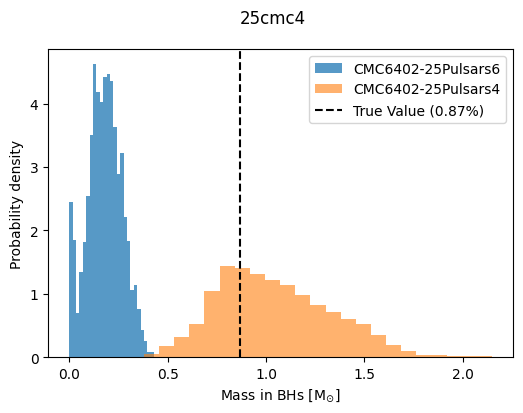

In [ ]:
import matplotlib.pyplot as plt

# Create figure and axis
fig_p, ax = plt.subplots(figsize=(6, 4))

# Plot with transparency, providing the figure object fig_p instead of ax
mviz_3.plot_f_BH(fig_p, ax=ax, color='blue', label='CMC6402-25Pulsars6', bins=25, density=True, alpha=0.75)  # Changed fig to fig_p
mviz_2.plot_f_BH(fig=fig_p, ax=ax, color='orange', label='CMC6402-25Pulsars4', bins=25, density=True, alpha=0.6)  # Changed fig to fig_p
#mviz_3.plot_f_BH(fig=fig_p, ax=ax, color='green', label='CMC6402-NoPulsar', bins=25, density=True, alpha=0.5)
#mviz_4.plot_f_BH(fig=fig_p, ax=ax, color='red', label='CMC6402-10Pulsars3', bins=25, density=True, alpha=0.5)
# Customize labels and title
ax.set_xlabel('Mass in BHs [M$_{\odot}$]')
ax.set_ylabel('Probability density')
ax.axvline(.87, color='black', linestyle='dashed', linewidth=1.5, label='True Value (0.87%)')

# Force legend to appear correctly
ax.legend()

# Ensure transparent background
fig_p.patch.set_alpha(0)  # Figure background
ax.patch.set_alpha(0)      # Axis background

# Show or save with transparency
plt.savefig('BH massf .png', dpi=300, transparent=True)
plt.show()

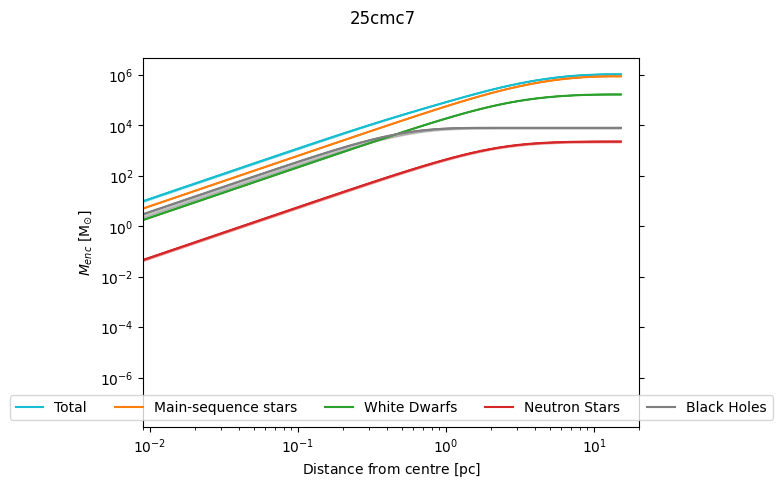

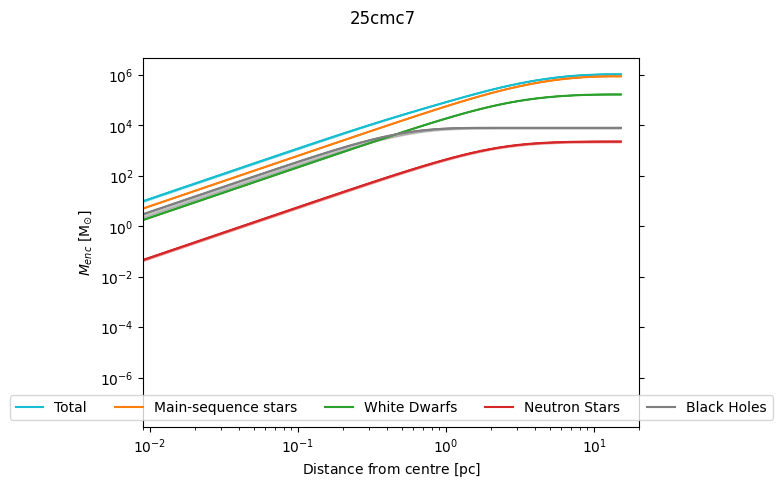

In [ ]:
mviz_1.plot_cumulative_mass()

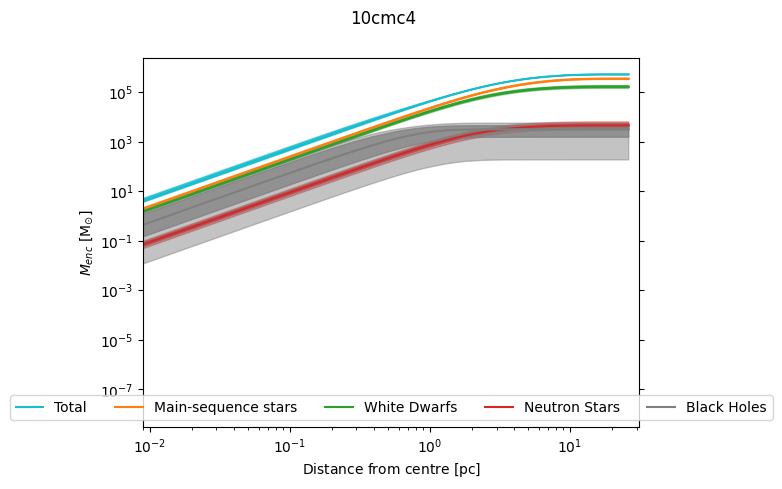

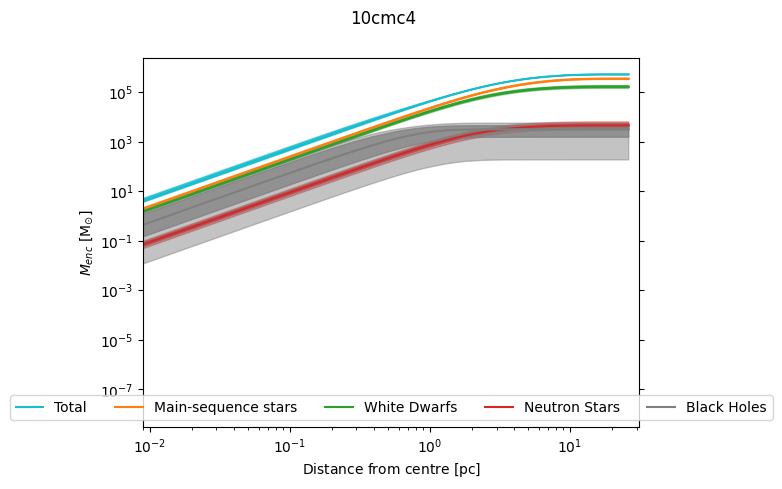

In [ ]:
mviz_2.plot_cumulative_mass()

In [ ]:
import matplotlib.pyplot as plt

# Increase the figure size to make the plot bigger
fig_p = plt.figure(figsize=(30,20))  # Width = 20 inches, Height = 16 inches

# Plot the blue data first
nest_run_2.plot_marginals(fig=fig_p, color='blue', label='5 pulsars (1)')

nest_run_1.plot_marginals(fig=fig_p, color='red', label='5 pulsars (2)')

# Adjust the spacing between subplots to prevent overlap
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, hspace=0.1, wspace=0.1)


# Reduce the font size to fit more axis labels and tick labels
for ax in fig_p.get_axes():
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.xaxis.label.set_size(11)
    ax.yaxis.label.set_size(11)
    ax.title.set_size(12)

# Add a legend with smaller font size
ax_combined = fig_p.gca()
ax_combined.legend(fontsize=10)

# Add the legend manually
handles, labels = ax_combined.get_legend_handles_labels()  # Get handles and labels from the plot
ax_combined.legend(handles, labels)  # Create legend from those handles and labels
ax_combined.legend()
# Show the plot with the legend
plt.show()
# Save the larger figure to a PDF
fig_p.savefig('larger_combined_plot.pdf')

# Show the larger plot
plt.show()

In [ ]:
mviz_1.mj


<Quantity [0.79177134, 1.6       ] solMass>

In [ ]:
# Extract column names and array of values
column_names, array_values = nest_run_1._get_equal_weight_chains()

# Convert array values to a list of dictionaries
dict_list = []
for row in array_values:
    sample_dict = dict(zip(column_names, row))
    dict_list.append(sample_dict)

# Now dict_list contains all the dictionaries
import random # Select 20 random dictionaries
random_dicts = random.sample(dict_list, 25) # Use dict_list instead of sample_dict

# Print the selected random dictionaries
for i, sample_dict in enumerate(random_dicts, 1):
    print(f"{sample_dict}")

{'W0': np.float64(2.758469256916566), 'M': np.float64(0.5161525124899212), 'rh': np.float64(4.730610967409957), 'ra': np.float64(0.26787313251258765), 'g': np.float64(0.7513223043645582), 'delta': np.float64(0.3189510815318519), 's2': np.float64(13.814915694335536), 'F': np.float64(6.7694858182629085), 'a1': np.float64(1.8027287613708385), 'a2': np.float64(1.875317398964098), 'a3': np.float64(1.9259837600440934), 'BHret': np.float64(0.49582148665449155), 'd': np.float64(9.210754901833303)}
{'W0': np.float64(2.5554213236999286), 'M': np.float64(0.5154271677535851), 'rh': np.float64(4.664833431089093), 'ra': np.float64(0.3422699423203324), 'g': np.float64(0.8163432510998565), 'delta': np.float64(0.34236385685160386), 's2': np.float64(13.47854981802309), 'F': np.float64(6.369386433085048), 'a1': np.float64(1.7638906195263515), 'a2': np.float64(1.780547255983152), 'a3': np.float64(1.9788787363042206), 'BHret': np.float64(2.7569890614540142), 'd': np.float64(9.224953882686208)}
{'W0': np.fl

In [ ]:
#theta ={'W0': np.float64(2.2489509798123506), 'M': np.float64(0.5632283168606558), 'rh': np.float64(4.2'W041117655537028), 'ra': np.float64(0.10534219298408057), 'g': np.float64(0.6850887515413517), 'delta': np.float64(0.30625561027439513), 's2': np.float64(9.88163094422693), 'F': np.float64(7.047095270852986), 'a1': np.float64(1.9615557968381019), 'a2': np.float64(1.9672025219252716), 'a3': np.float64(2.0374596601261676), 'BHret': np.float64(2.5166878567889674), 'd': np.float64(8.52991269899388)}
lamb= {'W0': np.float64(2.88630961605015), 'M': np.float64(0.5166613075326615), 'rh': np.float64(4.753064559277739), 'ra': np.float64(0.2959085696821064), 'g': np.float64(0.6712480548891788), 'delta': np.float64(0.30485056357992224), 's2': np.float64(14.911943759639234), 'F': np.float64(6.928541296136922), 'a1': np.float64(1.7955359237214576), 'a2': np.float64(1.836284816608468), 'a3': np.float64(1.9306932881609495), 'BHret': np.float64(0.5988928442328141), 'd': np.float64(9.215684875804568)}

In [ ]:
M62c = gcfit.FittableModel(lamb, observations=obs)

In [ ]:
mj = M62c.mj.value
Mj = M62c.Mj.value
indices = np.where(mj >= 1.6)[0]
Mj_selected = Mj[indices]
mj_selected = mj[indices]
t = (mj_selected) / (Mj_selected)

result = np.sum(t)
print(result)
print(result*100)

5.1710059677434534
517.1005967743454


In [ ]:
mj = M62c.mj.value
Mj = M62c.Mj.value
indices = np.where(mj >= 1.6)[0]
mj_selected = mj[indices]
mj_selected

array([ 5.89846   ,  7.09375061,  8.93228082, 11.24250269,  1.6       ])

In [ ]:
M_bh= np.sum(mj_selected)
M_bh

np.float64(34.76699412066802)

In [ ]:
M_cluster= np.sum(Mj_selected)
M_cluster

np.float64(1172.8953357533724)

In [ ]:
(M_cluster/600000)*100

np.float64(0.1954825559588954)

##BLACK HOLE MASS FRACTION

In [ ]:
# Extract column names and array of values
column_names, array_values = nest_run_1._get_equal_weight_chains()

# Convert array values to a list of dictionaries
dict_list = []
for row in array_values:
    sample_dict = dict(zip(column_names, row))
    dict_list.append(sample_dict)

# Now dict_list contains all the dictionaries
import random # Select 20 random dictionaries
random_dicts = random.sample(dict_list, 5) # Use dict_list instead of sample_dict

# Print the selected random dictionaries
for i, sample_dict in enumerate(random_dicts, 1):
    print(f"{sample_dict}")

{'W0': np.float64(2.9785583000626006), 'M': np.float64(0.37620902028556263), 'rh': np.float64(4.821043713991597), 'ra': np.float64(0.7899747570865887), 'g': np.float64(0.9893601997116643), 'delta': np.float64(0.43535833449184713), 's2': np.float64(13.831960255914103), 'F': np.float64(3.111120139700349), 'a1': np.float64(1.162732817387493), 'a2': np.float64(2.3484633911527064), 'a3': np.float64(2.4358788932651008), 'BHret': np.float64(6.6300123357867795), 'd': np.float64(8.672688689730634)}
{'W0': np.float64(3.062061743960404), 'M': np.float64(0.38670952440768147), 'rh': np.float64(4.752225256599992), 'ra': np.float64(0.3897736990336983), 'g': np.float64(0.9844222320975305), 'delta': np.float64(0.35061444092960053), 's2': np.float64(13.33203398336915), 'F': np.float64(4.099552414776084), 'a1': np.float64(1.1979566135365682), 'a2': np.float64(2.324407493255338), 'a3': np.float64(2.3777794761592355), 'BHret': np.float64(6.096980626194581), 'd': np.float64(8.84201266498758)}
{'W0': np.floa

In [ ]:
sample_dict

{'W0': np.float64(3.0128107957757058),
 'M': np.float64(0.38248718178101154),
 'rh': np.float64(4.664262649045229),
 'ra': np.float64(0.5675108736862349),
 'g': np.float64(1.3822568637935326),
 'delta': np.float64(0.33884893262280846),
 's2': np.float64(8.788938488764915),
 'F': np.float64(4.027092505326689),
 'a1': np.float64(1.3150224460927045),
 'a2': np.float64(2.2941703019874895),
 'a3': np.float64(2.661691397814971),
 'BHret': np.float64(27.140173829655883),
 'd': np.float64(8.874758237778114)}

In [ ]:
cmc = gcfit.FittableModel(sample_dict, observations=obs)

In [ ]:
mj = cmc.mj.value
Mj = cmc.Mj.value
indices = np.where(mj >= 1.6)[0]
Mj_selected = Mj[indices]
M_cluster= np.sum(Mj_selected)
Mbh=(M_cluster/400000)*100


np.float64(0.7436478293405887)

In [ ]:
Mbh_true=0.898

In [ ]:
line=(Mbh-Mbh_true)

In [ ]:
!pip install google-colab

import numpy as np
import matplotlib.pyplot as plt

#Step 1: Upload the file
print("Please upload your file:")
uploaded = files.upload()

# Step 2: Get the uploaded file name
file_name = list(uploaded.keys())[0]  # Get the file name
print(f"Uploaded file: {file_name}")

# Step 3: Load the Excel file
df = pd.read_excel(file_name)




Please upload your file:


Saving goodfits.xlsx to goodfits (1).xlsx
Uploaded file: goodfits (1).xlsx


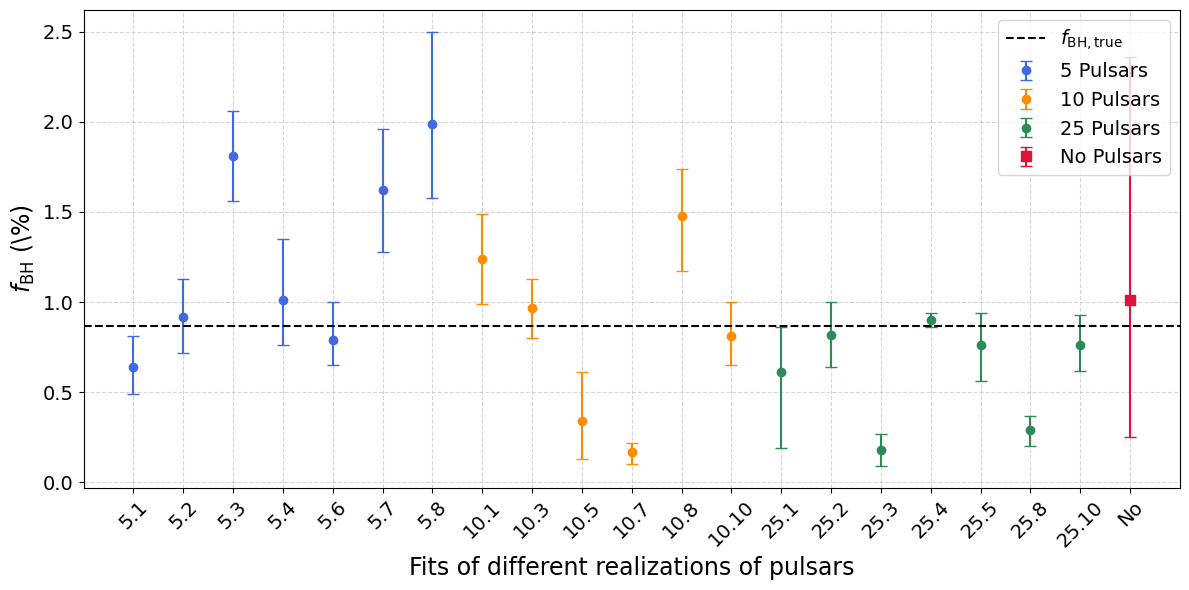

In [ ]:
import matplotlib.pyplot as plt

# Data
pulsar_labels = [
    "5.1", "5.2", "5.3", "5.4", "5.6", "5.7", "5.8",
    "10.1", "10.3", "10.5", "10.7", "10.8", "10.10",
    "25.1", "25.2", "25.3", "25.4", "25.5", "25.8", "25.10",
    "No"
]
medians = [
    0.64, 0.92, 1.81, 1.01, 0.79, 1.62, 1.99,
    1.24, 0.97, 0.34, 0.17, 1.48, 0.81,
    0.61, 0.82, 0.18, 0.90, 0.76, 0.29, 0.76,
    1.01  # No Pulsars
]
lower_errors = [
    0.15, 0.20, 0.25, 0.25, 0.14, 0.34, 0.41,
    0.25, 0.17, 0.21, 0.07, 0.31, 0.16,
    0.42, 0.18, 0.09, 0.04, 0.20, 0.09, 0.14,
    0.76  # No Pulsars
]
upper_errors = [
    0.17, 0.21, 0.25, 0.34, 0.21, 0.34, 0.51,
    0.25, 0.16, 0.27, 0.05, 0.26, 0.19,
    0.25, 0.18, 0.09, 0.04, 0.18, 0.08, 0.17,
    1.35  # No Pulsars
]

# X positions
x_pos = list(range(len(pulsar_labels)))

# Indices for groups
group_5 = list(range(0, 7))        # 5.x
group_10 = list(range(7, 13))      # 10.x
group_25 = list(range(13, 20))     # 25.x
group_no = [20]                    # "No Pulsars"

# Colors
colors = {
    "5": "royalblue",
    "10": "darkorange",
    "25": "seagreen",
    "no": "crimson"
}

# Plot
plt.figure(figsize=(12, 6))

# Group 5
plt.errorbar(
    [x_pos[i] for i in group_5],
    [medians[i] for i in group_5],
    yerr=[[lower_errors[i] for i in group_5], [upper_errors[i] for i in group_5]],
    fmt='o', color=colors["5"], label="5 Pulsars", capsize=4, markersize=6
)

# Group 10
plt.errorbar(
    [x_pos[i] for i in group_10],
    [medians[i] for i in group_10],
    yerr=[[lower_errors[i] for i in group_10], [upper_errors[i] for i in group_10]],
    fmt='o', color=colors["10"], label="10 Pulsars", capsize=4, markersize=6
)

# Group 25
plt.errorbar(
    [x_pos[i] for i in group_25],
    [medians[i] for i in group_25],
    yerr=[[lower_errors[i] for i in group_25], [upper_errors[i] for i in group_25]],
    fmt='o', color=colors["25"], label="25 Pulsars", capsize=4, markersize=6
)

# No Pulsars
plt.errorbar(
    [x_pos[i] for i in group_no],
    [medians[i] for i in group_no],
    yerr=[[lower_errors[i] for i in group_no], [upper_errors[i] for i in group_no]],
    fmt='s', color=colors["no"], label="No Pulsars", capsize=4, markersize=7
)

# Reference line
Mbh_true = 0.87
plt.axhline(Mbh_true, color="black", linestyle="--", label=r"$f_{\mathrm{BH,true}}$", linewidth=1.5)

# Labels and formatting
plt.xticks(x_pos, pulsar_labels, rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Fits of different realizations of pulsars", fontsize=17)
plt.ylabel(r"$f_{\mathrm{BH}}$ (\%)", fontsize=17)

plt.legend(fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("pulsar_medians.png", dpi=300)
plt.show()


In [ ]:
cluster = "NGC6266"
obs = gcfit.Observations(cluster)

gau641nop = analysis.NestedRun('/content/sample_data/gau641nop.hdf', obs)
gau641nop.name = "a"
gau641wp = analysis.NestedRun('/content/sample_data/gau641wp.hdf', obs)
gau641nop.name = "b"

uni57nop = analysis.NestedRun('/content/sample_data/uni57nop.hdf', obs)
uni57nop.name = "e"
uni57wp = analysis.NestedRun('/content/sample_data/uni57wp.hdf', obs)
uni57wp.name = "f"

only_p_gau641 = analysis.NestedRun('/content/sample_data/only_p_gau641.hdf', obs)
only_p_gau641.name = "k"


run_collection = analysis.RunCollection([gau641nop, gau641wp,uni57nop,uni57wp, only_p_gau641 ], sort=False)


import matplotlib.pyplot as plt

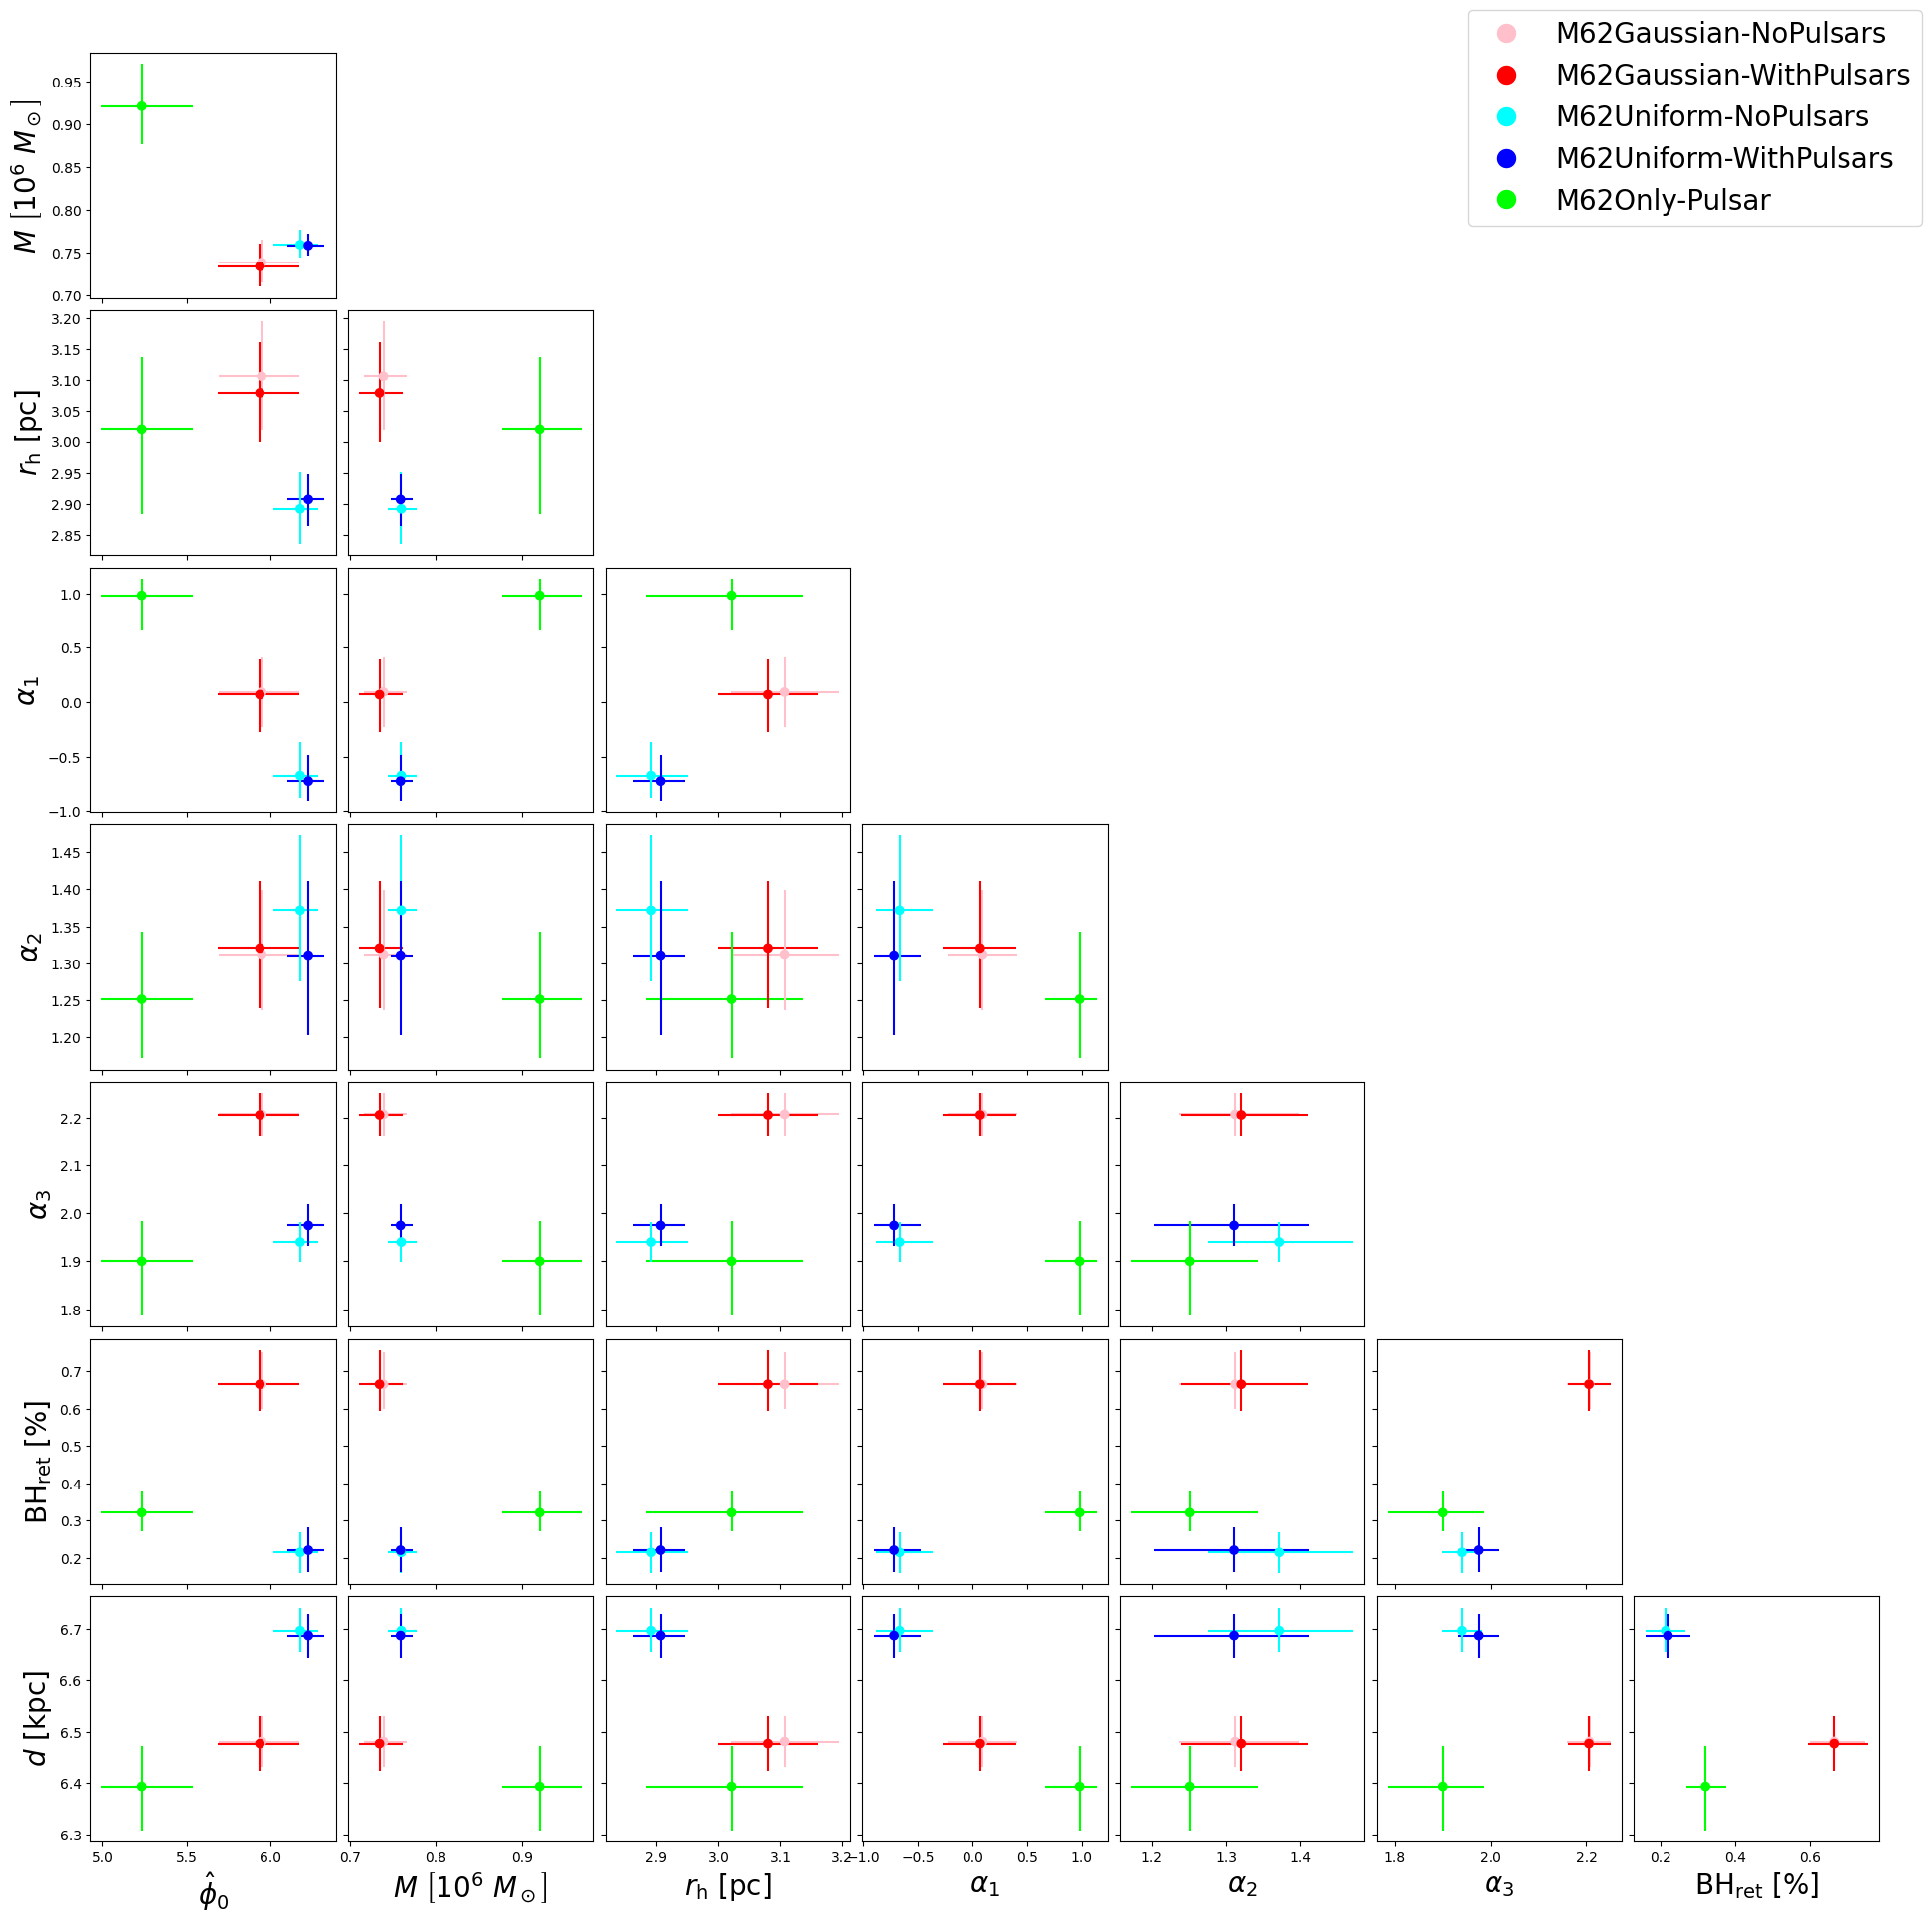

In [ ]:
import matplotlib.pyplot as plt

# Set global font size for better readability
plt.rcParams.update({
    "font.size": 20,  # Overall font size
    "axes.titlesize": 20,  # Title font size
    "axes.labelsize": 20,  # Axis label size
    "xtick.labelsize": 10,  # X-axis tick label size
    "ytick.labelsize": 10,  # Y-axis tick label size
})

# Define parameters and colors
params = ['W0','M', 'rh', 'a1', 'a2', 'a3', 'BHret', 'd']
colors = ['pink', 'red', 'cyan', 'blue', 'lime']
legend_labels = [
    "M62Gaussian-NoPulsars", "M62Gaussian-WithPulsars",
    "M62Uniform-NoPulsars", "M62Uniform-WithPulsars",
    "M62Only-Pulsar"
]

# Generate the corner plot
corner_fig = run_collection.plot_param_corner(params, clr_param=colors)

# Set figure size before saving
corner_fig.set_size_inches(20, 20)

# Create legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=15) for color in colors]

# Add legend
corner_fig.legend(handles, legend_labels, loc='upper right', bbox_to_anchor=(1, 1), fontsize=20)

# Save the figure to PDF
corner_fig.savefig("corner_plot_with_legend.pdf", format="pdf", dpi=300)
corner_fig.savefig("corner_plot_with_legend.jpg", format="jpg", dpi=300)
# Show the plot
plt.show()


In [ ]:
nest_run_1._get_equal_weight_chains()

(['W0',
  'M',
  'rh',
  'ra',
  'g',
  'delta',
  's2',
  'F',
  'a1',
  'a2',
  'a3',
  'BHret',
  'd'],
 array([[ 3.13688789,  0.41011015,  4.62835769, ...,  2.22617257,
          2.98594832,  8.72003631],
        [ 2.68959101,  0.40533715,  4.55393137, ...,  2.30757045,
          9.39761123,  8.71791494],
        [ 3.03057562,  0.40169077,  4.55674907, ...,  2.41973848,
         14.91259127,  8.71992388],
        ...,
        [ 3.17950435,  0.40593245,  4.59691388, ...,  2.37516232,
         10.4410027 ,  8.70570081],
        [ 2.98757816,  0.40421365,  4.57470362, ...,  2.3949822 ,
         11.45946347,  8.71701606],
        [ 2.71566687,  0.40025966,  4.50324656, ...,  2.24976844,
          7.85965701,  8.72261506]]))